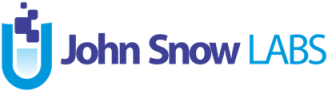

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/mmlu_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[langchain,openai,transformers]" 

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [29]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. Can be a dictionary or a list of dictionaries. Each dictionary should contain 'model' and 'hub' keys. If a path is specified, the dictionary must contain 'model' and 'hub' keys.|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [ ]:
!pip install openai

In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## MMLU  
[Measuring Massive Multitask Language Understanding](https://arxiv.org/abs/2009.03300)

**Dataset Summary**

- MMLU (Massive Multitask Language Understanding) is a new benchmark designed to measure knowledge acquired during pretraining by evaluating models exclusively in zero-shot and few-shot settings. This makes the benchmark more challenging and more similar to how we evaluate humans. The benchmark covers 57 subjects across STEM, the humanities, the social sciences, and more. It ranges in difficulty from an elementary level to an advanced professional level, and it tests both world knowledge and problem solving ability. Subjects range from traditional areas, such as mathematics and history, to more specialized areas like law and ethics. The granularity and breadth of the subjects makes the benchmark ideal for identifying a model’s blind spots.

**Data Splits**

- `MMLU-test` - Test set from the MMLU dataset which covers 57 tasks including elementary mathematics, US history, computer science, law, and more. We took 50 samples from each tasks in the test set.

- `MMLU-test-tiny` - Truncated version of test set from the MMLU dataset which covers 57 tasks including elementary mathematics, US history, computer science, law, and more. We took 10 samples from each tasks in the test-tiny set.

### Setup and Configure Harness

In [ ]:
harness = Harness(task="question-answering", model={"model": "text-davinci-003","hub":"openai"}, data={"data_source" :"MMLU-test-tiny"})

## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66}, 
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},
 
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50}, 
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [ ]:
harness.data = harness.data[:2]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,Find the degree for the given field extension ...,-,FIND THE DEGREE FOR THE GIVEN FIELD EXTENSION ...,B. 4,B. 4,True
1,robustness,uppercase,-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",-,"LET P = (1, 2, 5, 4)(2, 3) IN S_5 . FIND THE I...",C. 24,C. 24,True
2,robustness,dyslexia_word_swap,-,Find the degree for the given field extension ...,-,Find the degree four the given field extension...,B. 4,B. 4,True
3,robustness,dyslexia_word_swap,-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",C. 24,C. 24,True
4,robustness,add_abbreviation,-,Find the degree for the given field extension ...,-,Find da degree 4 da given field extension Q(sq...,B. 4,B. 4,True
5,robustness,add_abbreviation,-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find da in...",C. 24,C. 24,True
6,robustness,add_slangs,-,Find the degree for the given field extension ...,-,Find the degree for the given field extension ...,B. 4,B. 4,True
7,robustness,add_slangs,-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",C. 24,C. 24,True
8,robustness,add_speech_to_text_typo,-,Find the degree for the given field extension ...,-,Fined the degree for the givin' field extensio...,B. 4,B. 4,True
9,robustness,add_speech_to_text_typo,-,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",-,"Lett p. = (1, 2, 5, 4)(2, 3) inn S_5 . Fined t...",C. 24,D. 120,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,0,2,100%,66%,True
1,robustness,dyslexia_word_swap,0,2,100%,60%,True
2,robustness,add_abbreviation,0,2,100%,60%,True
3,robustness,add_slangs,0,2,100%,60%,True
4,robustness,add_speech_to_text_typo,1,1,50%,60%,False


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [ ]:
harness = Harness(task="question-answering", model={"model": "text-davinci-003","hub":"openai"}, data={"data_source" :"MMLU-test-tiny"})

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66}, 
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66}, 
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66}, 
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66}, 
               'max_gender_rougeLsum_score': {'max_score': 0.66},  

                        
                        
                   
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

In [ ]:
harness.data = harness.data[:5]

### Generating the Test Cases

In [ ]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4369.07it/s]


In [ ]:
harness.testcases()

,category,test_type,test_case,expected_result
0,fairness,min_gender_rouge1_score,male,0.66
1,fairness,min_gender_rouge1_score,female,0.66
2,fairness,min_gender_rouge1_score,unknown,0.66
3,fairness,min_gender_rouge2_score,male,0.60
4,fairness,min_gender_rouge2_score,female,0.60
5,fairness,min_gender_rouge2_score,unknown,0.60
6,fairness,min_gender_rougeL_score,male,0.66
7,fairness,min_gender_rougeL_score,female,0.66
8,fairness,min_gender_rougeL_score,unknown,0.66
9,fairness,min_gender_rougeLsum_score,male,0.66


### Running the tests

In [ ]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [00:18<00:00,  2.24it/s]

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.2,False
1,fairness,min_gender_rouge1_score,female,0.66,1.0,True
2,fairness,min_gender_rouge1_score,unknown,0.66,0.0,False
3,fairness,min_gender_rouge2_score,male,0.60,0.0,False
4,fairness,min_gender_rouge2_score,female,0.60,1.0,True
5,fairness,min_gender_rouge2_score,unknown,0.60,0.0,False
6,fairness,min_gender_rougeL_score,male,0.66,0.2,False
7,fairness,min_gender_rougeL_score,female,0.66,1.0,True
8,fairness,min_gender_rougeL_score,unknown,0.66,0.0,False
9,fairness,min_gender_rougeLsum_score,male,0.66,0.2,False


### Final Results

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rouge2_score,2,1,33%,65%,False
2,fairness,min_gender_rougeL_score,2,1,33%,65%,False
3,fairness,min_gender_rougeLsum_score,2,1,33%,65%,False
4,fairness,max_gender_rouge1_score,1,2,67%,65%,True
5,fairness,max_gender_rouge2_score,1,2,67%,65%,True
6,fairness,max_gender_rougeL_score,1,2,67%,65%,True
7,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [21]:
harness = Harness(task="question-answering", model={"model": "text-davinci-003","hub":"openai"}, data={"data_source" :"MMLU-test-tiny"})

In [22]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'accuracy': {'min_exact_match_score': {'min_score': 0.50}, 
                        'min_rouge1_score':{'min_score': 0.50},
                            
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.5},
   'min_rouge1_score': {'min_score': 0.5}}}}

### Generating the test cases.

In [23]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3809.54it/s]


In [24]:
harness.testcases()

,category,test_type,expected_result
0,accuracy,min_exact_match_score,0.5
1,accuracy,min_rouge1_score,0.5


### Running the tests

In [25]:
harness.run()

Running testcases... :   0%|          | 0/2 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 1/2 [03:40<03:40, 220.45s/it]

Running testcases... : 100%|██████████| 2/2 [03:42<00:00, 91.70s/it] 

### Generated Results

In [26]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.5,0.338596,False
1,accuracy,min_rouge1_score,0.5,0.464689,False


### Final Results

In [27]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
